In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
from pylab import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [56]:
df=pd.read_csv("churn.csv")

In [57]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploration and Cleaning

Now we can perform some basic exploratory analysis to get a better understanding of what is in our data.

How much data we have

If there are any missing values

What data type each column is

The distribution of data in each column

We could also take this opportunity to plot some charts to help us get an idea of what variables / features will prove useful. For example, if we where thinking of doing some regression analysis, scatter charts could give us a visual indication of correlation between features.

The pandas library has plenty of built in functions to help us quickly understand summary information about our dataset. Below we use the shape() method to check how many rows are in our dataset and the describe() method to confirm whether or not our columns have missing values.

In [58]:
df.shape

(7043, 21)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


This is a logistic regression problem where there are 20 inputs and 1 output in the dataset. There are total 3 columns with datatype float and all other are object datatype

In [60]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [61]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [62]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no null vales in the dataframe

In [63]:
df.drop("customerID",axis=1,inplace=True)

We have dropped the customerid column as it has no such impact in the dataset

In [64]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [65]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [66]:
df.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [67]:
df.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [68]:
df.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [69]:
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [70]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [71]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [72]:
df.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [73]:
df.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [74]:
df.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [75]:
df.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [76]:
df.StreamingTV.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [77]:
df.StreamingMovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [78]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [79]:
df.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [80]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [81]:
df.MonthlyCharges.value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [82]:
df.TotalCharges.value_counts()

           11
20.2       11
19.75       9
19.65       8
19.9        8
           ..
212.4       1
1362.85     1
4557.5      1
2697.4      1
237.2       1
Name: TotalCharges, Length: 6531, dtype: int64

In [83]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [84]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()


In [85]:
columns=["Churn","PaymentMethod","PaperlessBilling","gender","OnlineBackup","Contract","StreamingMovies","StreamingTV","TechSupport","DeviceProtection","OnlineSecurity","InternetService","MultipleLines","PhoneService","Dependents","Partner","SeniorCitizen"]
for i in columns:
    df[i]=LE.fit_transform(df[i])

In [86]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [88]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')


Converted the totalcharges column from object to float datatype

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


All the columns dtype are in int or float

In [90]:
print("Number of rows: ", df.shape[0])
counts = df.describe().iloc[0]
display(
    pd.DataFrame(
        counts.tolist(), 
        columns=["Count of values"], 
        index=counts.index.values
    ).transpose()
)

Number of rows:  7043


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Count of values,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7032.0,7043.0


In [91]:
#equally distributed columns count

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


<AxesSubplot:>

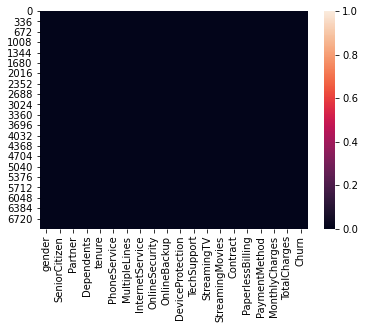

In [93]:
sns.heatmap(df.isnull())

There is no nll values displayed through graph

<AxesSubplot:xlabel='Churn', ylabel='count'>

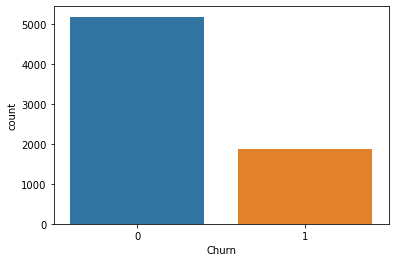

In [94]:
sns.countplot(df["Churn"])

Considering this as class balance problem only

In [95]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.771362,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


Description of the numerical columns

In [96]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102411,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.319072,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064653,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.825880,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113008,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.453202,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175691,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254473,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375556,-0.195525


<AxesSubplot:>

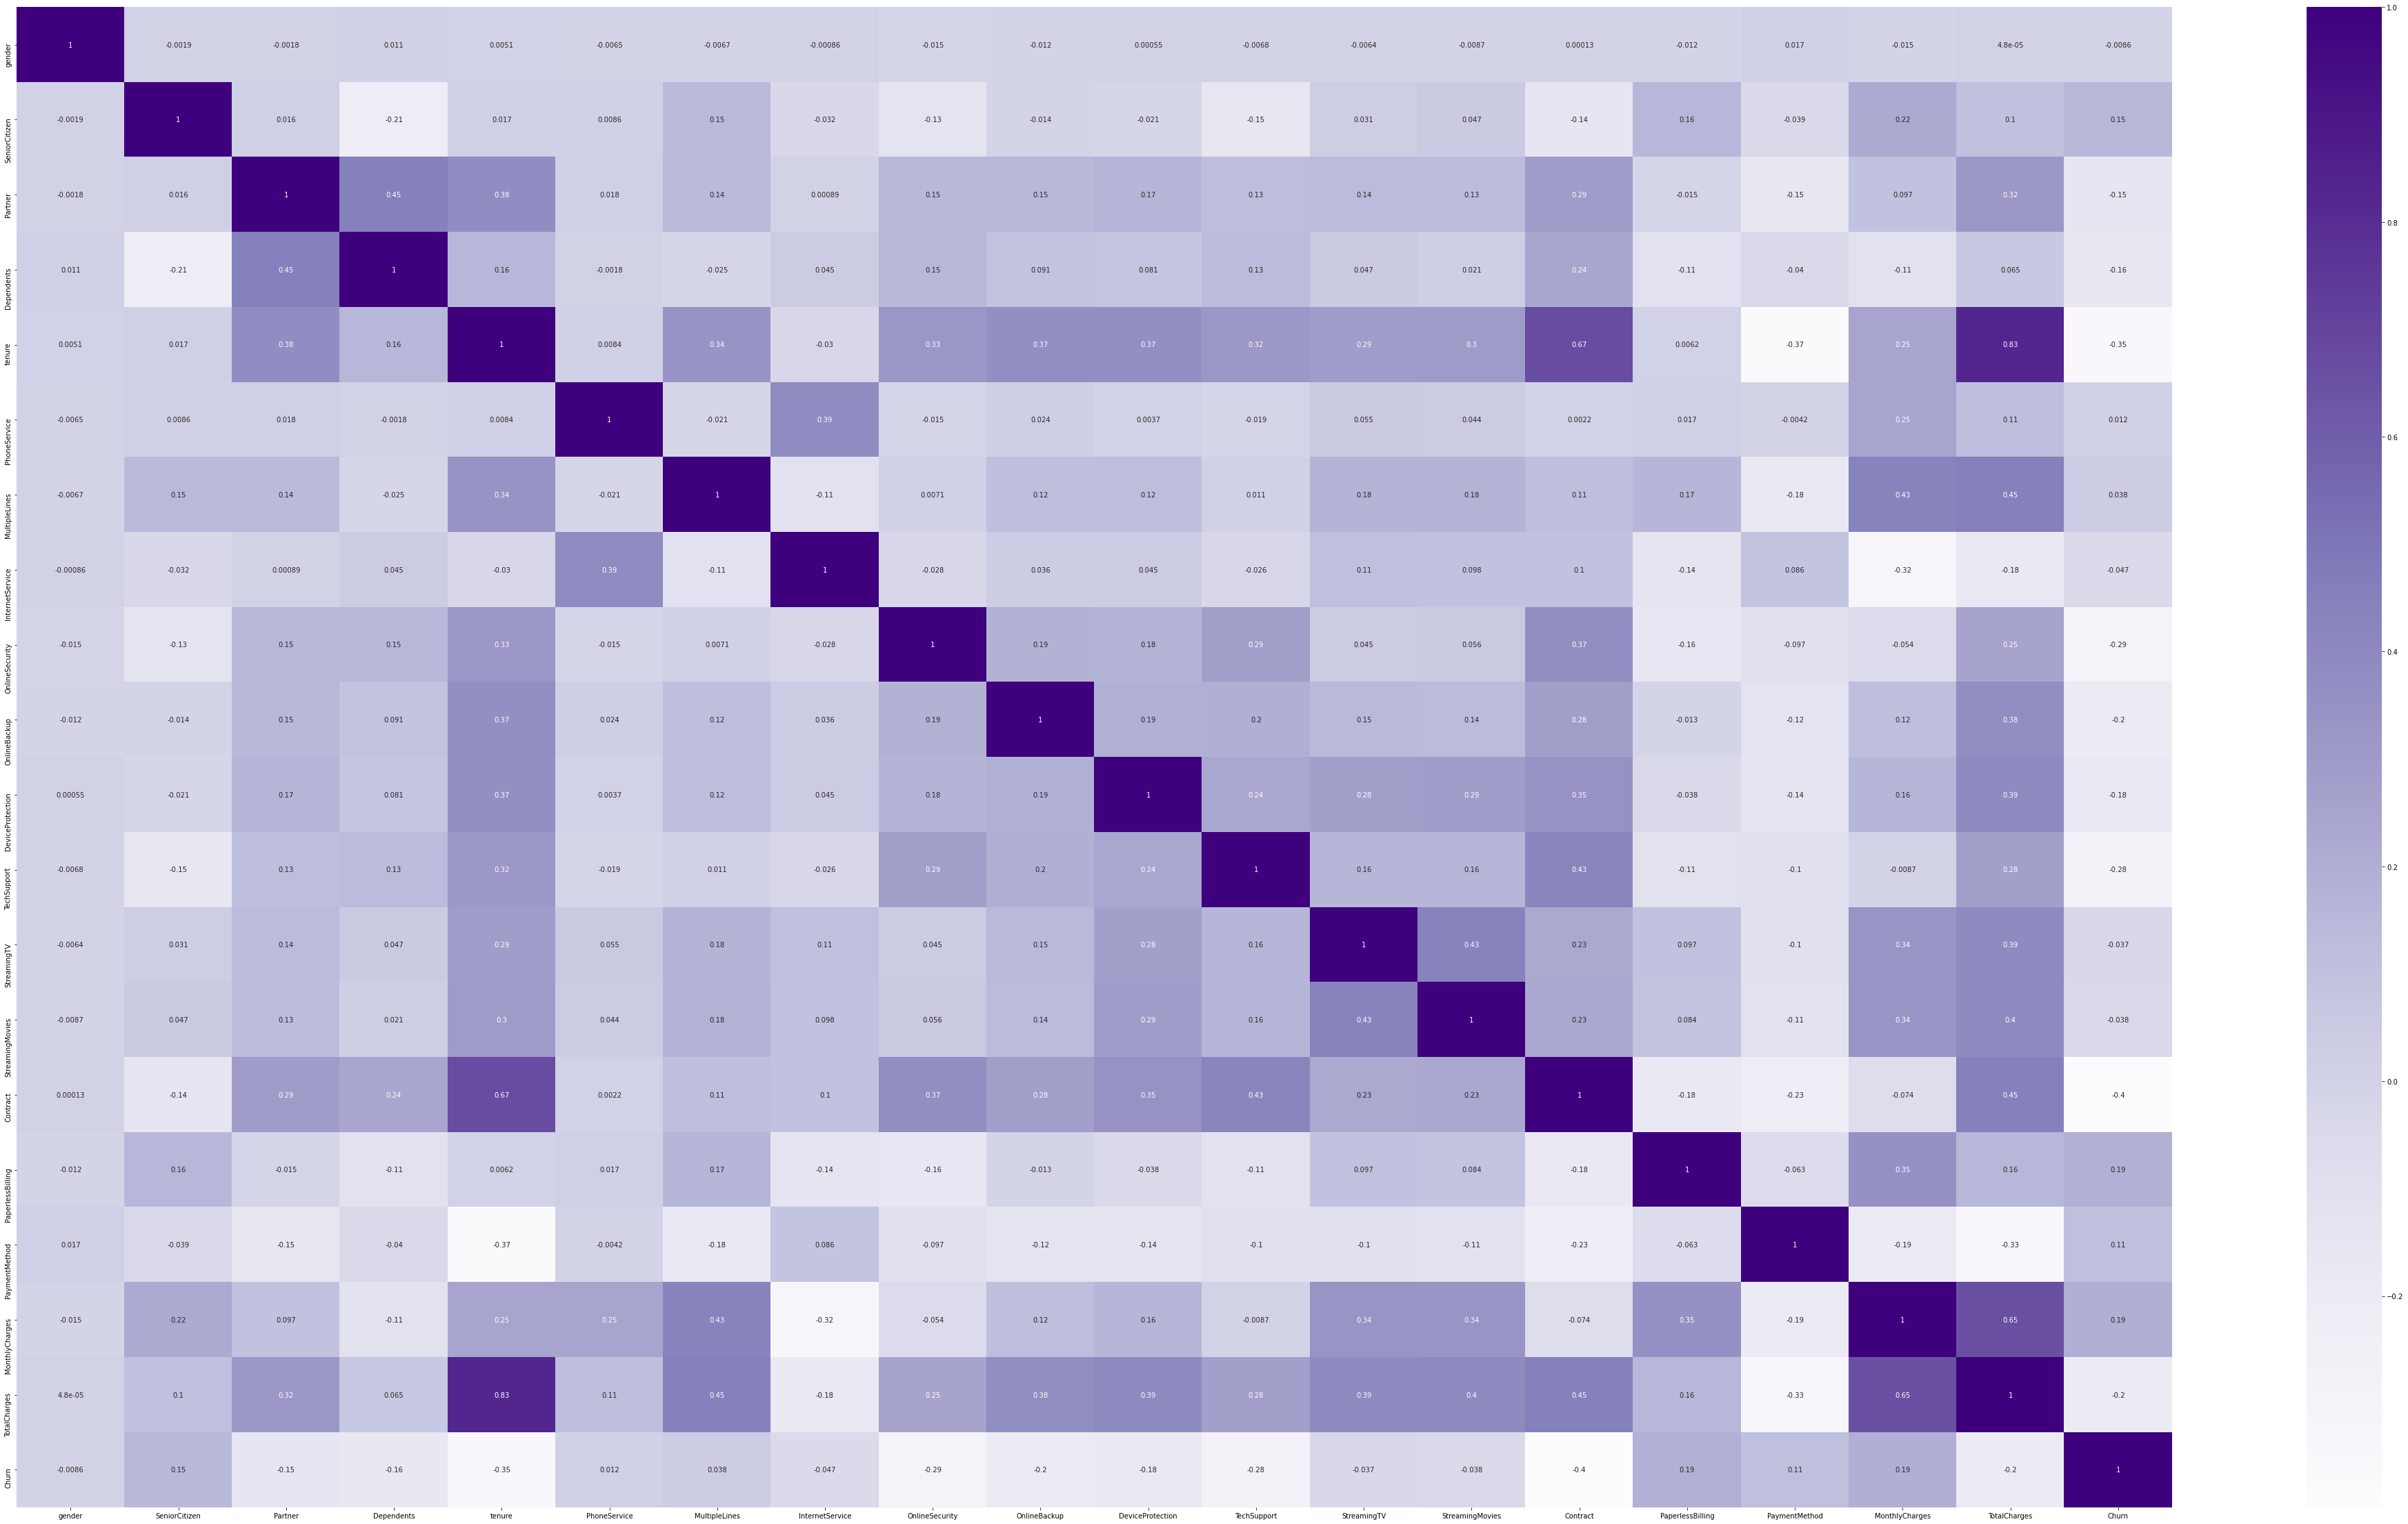

In [97]:
fig=plt.figure(figsize=(70,40))
hc=df.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="Purples")

The correlation graph where we can see the negative highly coorelated columns and positively highly coorelated columns.
The tenure and totalcharges are highly positively coorelated to each other.

To avoid unstable estimates of coeffiecients in the model, need to drop the ‘TotalCharges’ variable during regression process, as it is highly correlated to both ‘Tenure’ and ‘MonthlyCharges’.

In [98]:
df.drop("TotalCharges",axis=1,inplace=True)

In [99]:
#sns.pairplot(df)

<Figure size 432x288 with 0 Axes>

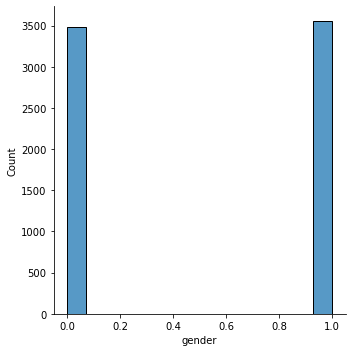

<Figure size 432x288 with 0 Axes>

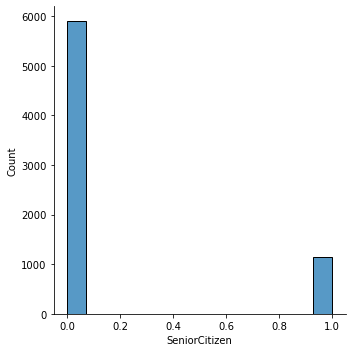

<Figure size 432x288 with 0 Axes>

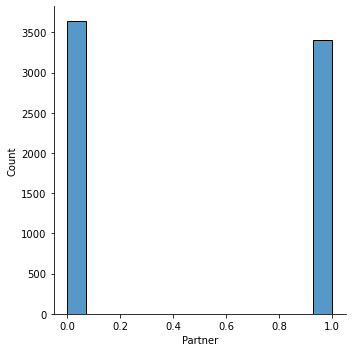

<Figure size 432x288 with 0 Axes>

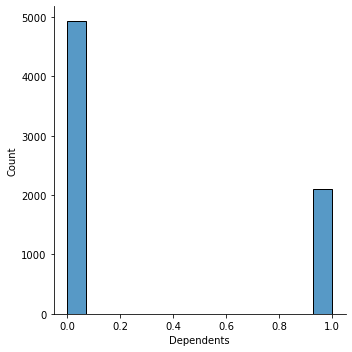

<Figure size 432x288 with 0 Axes>

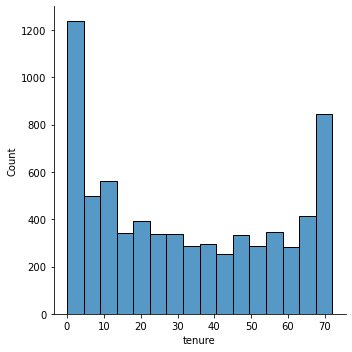

<Figure size 432x288 with 0 Axes>

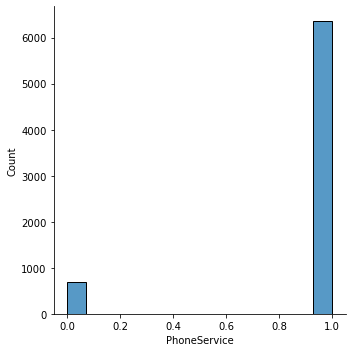

<Figure size 432x288 with 0 Axes>

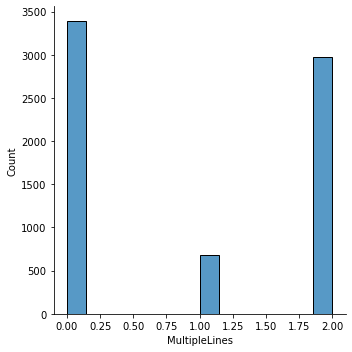

<Figure size 432x288 with 0 Axes>

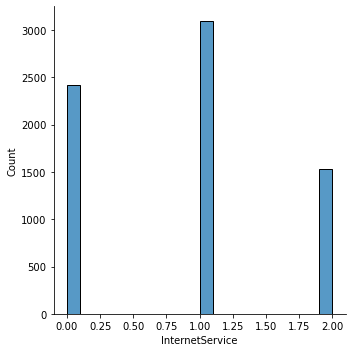

<Figure size 432x288 with 0 Axes>

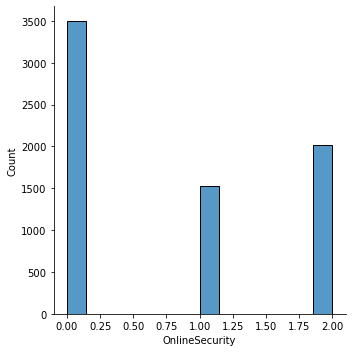

<Figure size 432x288 with 0 Axes>

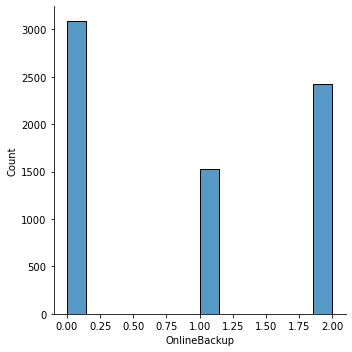

<Figure size 432x288 with 0 Axes>

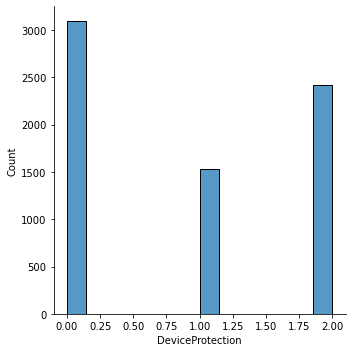

<Figure size 432x288 with 0 Axes>

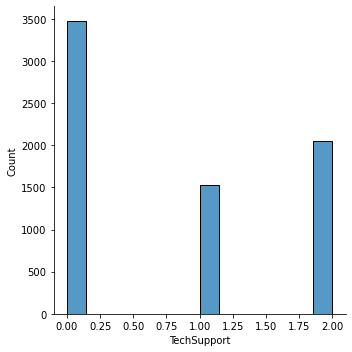

<Figure size 432x288 with 0 Axes>

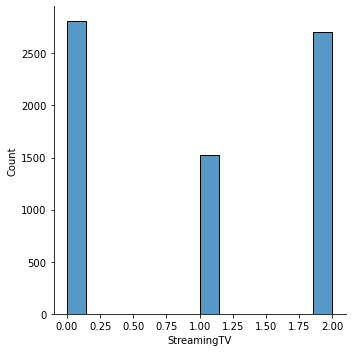

<Figure size 432x288 with 0 Axes>

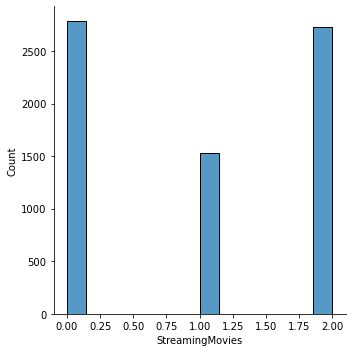

<Figure size 432x288 with 0 Axes>

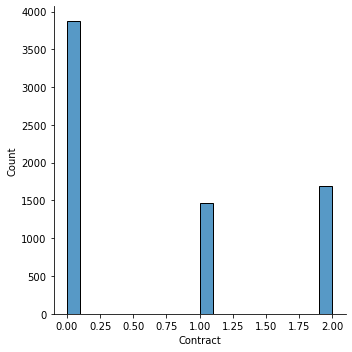

<Figure size 432x288 with 0 Axes>

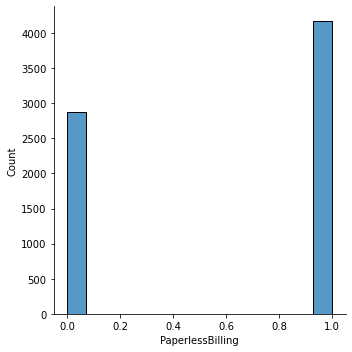

<Figure size 432x288 with 0 Axes>

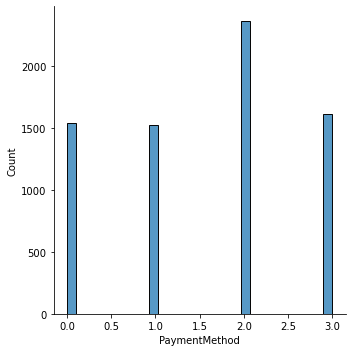

<Figure size 432x288 with 0 Axes>

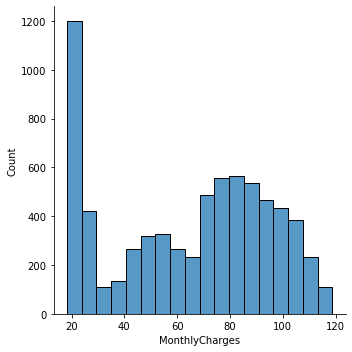

<Figure size 432x288 with 0 Axes>

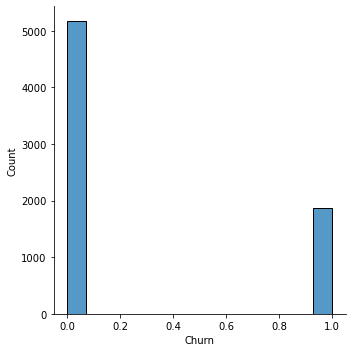

In [100]:
columns=df.columns

for i in df[columns]:
    plt.figure()
    sns.displot(df[i])

In [101]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
Churn               1.063031
dtype: float64

tenure montlycharges and totalcharges are the three numeriacal columns where the skewness can be removed

<AxesSubplot:xlabel='tenure', ylabel='Density'>

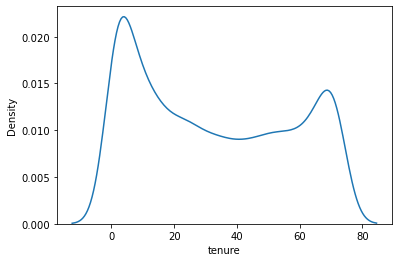

In [102]:
sns.kdeplot(df["tenure"])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

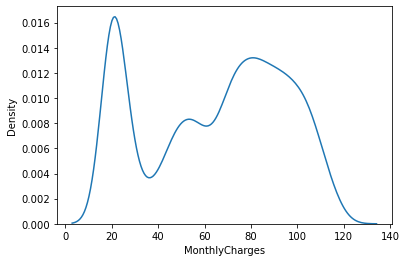

In [103]:
sns.kdeplot(df["MonthlyCharges"])

The outliers not to be removed for all the column by seeing the graph

<AxesSubplot:>

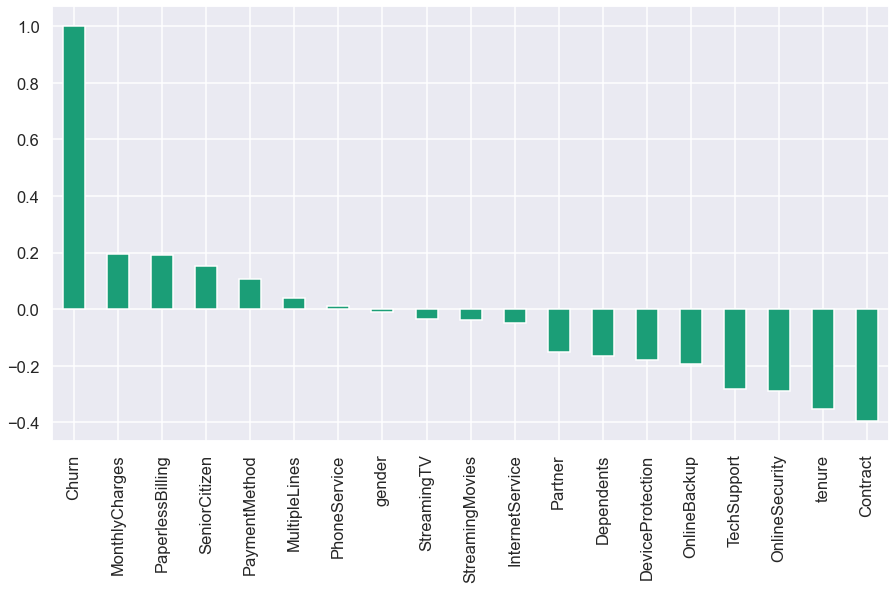

In [108]:
# Checking again Correlation of "Churn" with other variables on a different plot
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Monthlycharges, paperlessbilling, seniorcitzen, paymentmethod, multiplelines and gender are positively correlated with each other whereas gender, streamingtv, StreamingMovies, internetservice,partner,dependents,deviceprotection, onlinebackup, techsupport, onlinesecurity, tenure and contract are negatively coorelated ith churn column

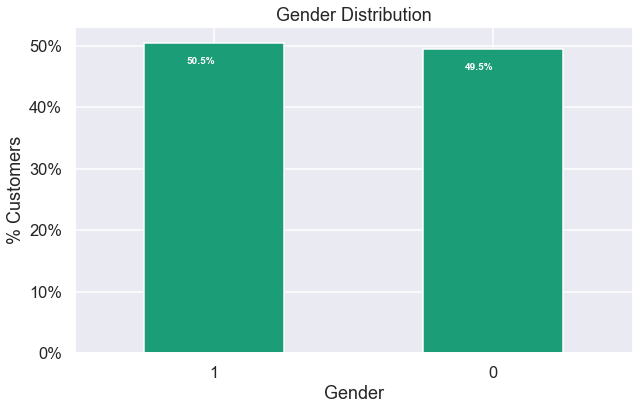

In [111]:
import matplotlib.ticker as mtick # For specifying the axes tick format 
rcParams['figure.figsize']=10,6

ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

totals = []  # creating a list to collect the plt.patches data

# finding the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)  # setting individual bar lables using above list

for i in ax.patches:
    # getting_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%', color='white', weight = 'bold')

Above plot shows almost equal number of male and female customers; 50.5% are male customers while the other 49.5% are female.

Text(0.5, 1.0, '% of Senior Citizens')

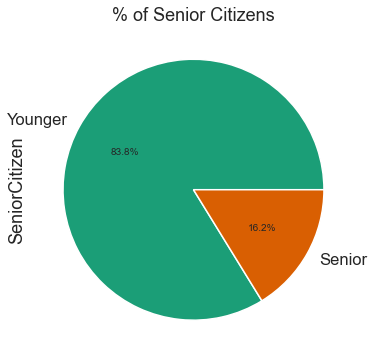

In [112]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Younger', 'Senior'])                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('% of Senior Citizens')

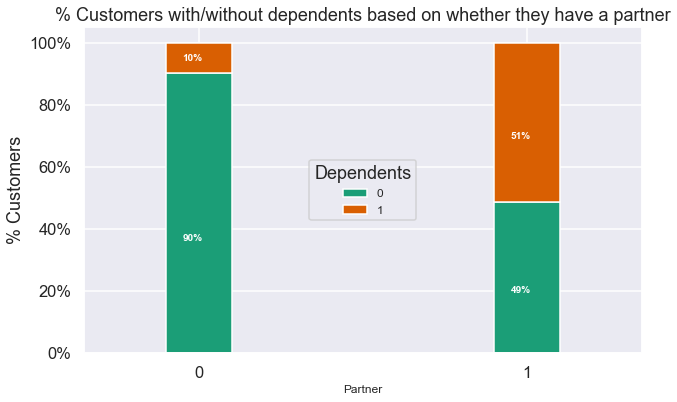

In [117]:
partner_dependents = df.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':12},title = 'Dependents')
ax.set_ylabel('% Customers')
ax.set_title('% Customers with/without dependents based on whether they have a partner')
ax.xaxis.label.set_size(12)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold')

Text(0.5, 1.0, 'Number of Customers by tenure')

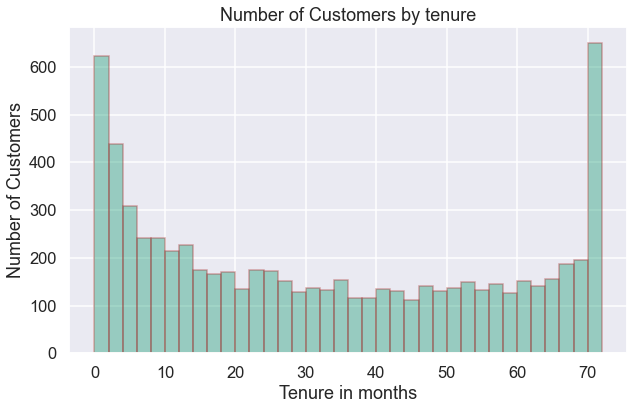

In [120]:
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'brown'},
             kde_kws={'linewidth': 5})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure in months')
ax.set_title('Number of Customers by tenure')

Text(0.5, 1.0, 'Number of Customers by Contract Type')

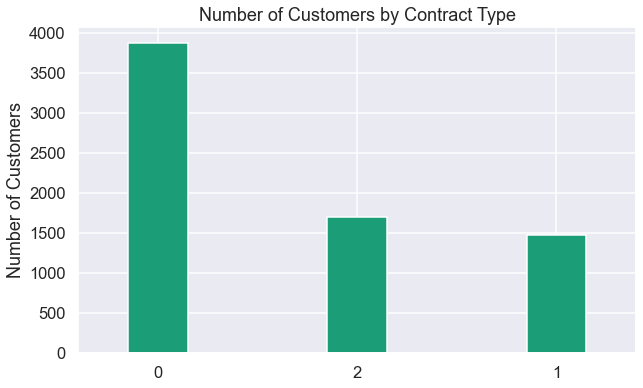

In [122]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

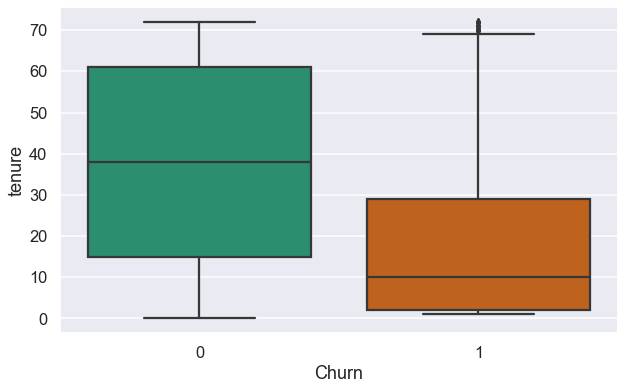

In [125]:
sns.boxplot(x = df.Churn, y = df.tenure)

In [126]:
x=df.drop("Churn",axis=1)
y=df["Churn"]


In [127]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(x)

X=pd.DataFrame(x,columns=x.columns)
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40


scaled the data through standard scaler

In [128]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("best accuracy is ",maxAccu," on Random sate ",maxRS)

best accuracy is  0.8263132986275438  on Random sate  178


In [138]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=178)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4930, 18)
(2113, 18)
(4930,)
(2113,)


In [139]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.8263132986275438
[[1426  129]
 [ 238  320]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1555
           1       0.71      0.57      0.64       558

    accuracy                           0.83      2113
   macro avg       0.78      0.75      0.76      2113
weighted avg       0.82      0.83      0.82      2113



In [133]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

accuracy score:
0.7572172266919073
[[1176  358]
 [ 155  424]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1534
           1       0.54      0.73      0.62       579

    accuracy                           0.76      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.79      0.76      0.77      2113



In [134]:
sv=SVC()
sv.fit(x_train,y_train)
pred2=sv.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

accuracy score:
0.7865593942262187
[[1429  105]
 [ 346  233]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1534
           1       0.69      0.40      0.51       579

    accuracy                           0.79      2113
   macro avg       0.75      0.67      0.69      2113
weighted avg       0.77      0.79      0.77      2113



In [135]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
pred3=rf.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(classification_report(y_test,pred3))

accuracy score:
0.7747278750591576
[[1369  165]
 [ 311  268]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1534
           1       0.62      0.46      0.53       579

    accuracy                           0.77      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113



In [136]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred4=ad.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred4))
print(confusion_matrix(y_test,pred4))
print(classification_report(y_test,pred4))

accuracy score:
0.8002839564600095
[[1384  150]
 [ 272  307]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1534
           1       0.67      0.53      0.59       579

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [140]:
#APPLYING CROSS VALIDATION
score=cross_val_score(lg,X,y,cv=5)
print(score)
print("/n")
print(score.mean())

[0.80624556 0.81263307 0.78779276 0.8046875  0.80397727]
/n
0.8030672341763985


In [141]:
score=cross_val_score(gnb,X,y,cv=5)
print(score)
print(score.mean())

[0.75940383 0.76295245 0.74520937 0.75710227 0.75213068]
0.7553597207884379


In [142]:
score=cross_val_score(sv,X,y,cv=5)
print(score)
print(score.mean())

[0.8012775  0.78992193 0.77430802 0.78764205 0.79332386]
0.7892946722369185


In [143]:
score=cross_val_score(rf,X,y,cv=5)
print(score)
print(score.mean())

[0.79985806 0.78850248 0.76721079 0.78622159 0.79900568]
0.7881597199819342


In [144]:
score=cross_val_score(ad,X,y,cv=5)
print(score)
print(score.mean())

[0.80979418 0.80624556 0.79843861 0.8046875  0.80610795]
0.8050547615975224


The least difference between the model accuracy and cross validation is in ADABoostClassifier so we will go for the same model.

In [152]:
print(confusion_matrix(y_test,pred4))


[[1225  330]
 [ 431  127]]


In [146]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [147]:
y_pred_prob=ad.predict_proba(x_test)[:,1]

In [148]:
y_pred_prob

array([0.49028066, 0.49762491, 0.49341049, ..., 0.49709075, 0.48900014,
       0.48782836])

In [149]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

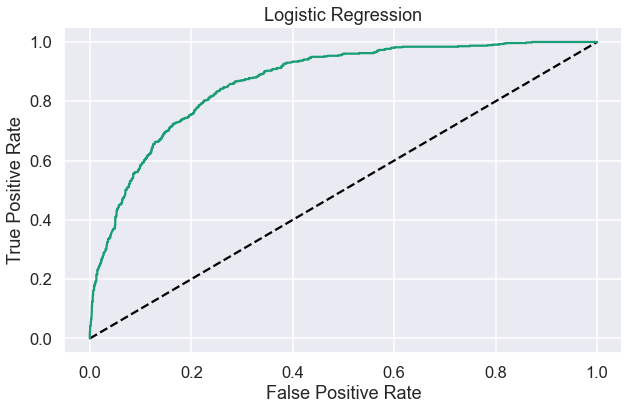

In [150]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()

auc-roc curve

In [153]:
joblib.dump(ad,"Customer_churn_final.obj")
print("object of the dataset has been created")

object of the dataset has been created
